In [2]:
from unscented_utils import get_weights, get_sigmas, unscented_transform, illustrate_unscented_transform

import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal

In [3]:
def f(x, y):
    return np.array([x + y + 50, .1*x**2 + y*y + 50])

# initial mean and covariance
mean = (0., 0.)
p = np.array([[32., 15], [15., 40.]])

# generate random points
np.random.seed(100)
xs, ys = multivariate_normal(mean=mean, cov=p, size=1000).T

# pass through nonlinear function
xs_nl, ys_nl = f(xs, ys)

alpha = .5
beta = 2
kappa = 0

In [4]:
mean_ut_merwe, cov_ut_merwe, sigmas_merwe, sigmas_f_merwe = unscented_transform(mean, p, f, method='merwe')
mean_ut_julier, cov_ut_julier, sigmas_julier, sigmas_f_julier = unscented_transform(mean, p, f, method='julier')
mean_ut_simplex, cov_ut_simplex, sigmas_simplex, sigmas_f_simplex = unscented_transform(mean, p, f, method='simplex')

# collect in dictionary
ut_dict = { 'merwe': {'mean': mean_ut_merwe, 'cov': cov_ut_merwe, 'sigmas': sigmas_merwe, 'sigmas_f': sigmas_f_merwe},
            'julier': {'mean': mean_ut_julier, 'cov': cov_ut_julier, 'sigmas': sigmas_julier, 'sigmas_f': sigmas_f_julier},
            'simplex': {'mean': mean_ut_simplex, 'cov': cov_ut_simplex, 'sigmas': sigmas_simplex, 'sigmas_f': sigmas_f_simplex}}

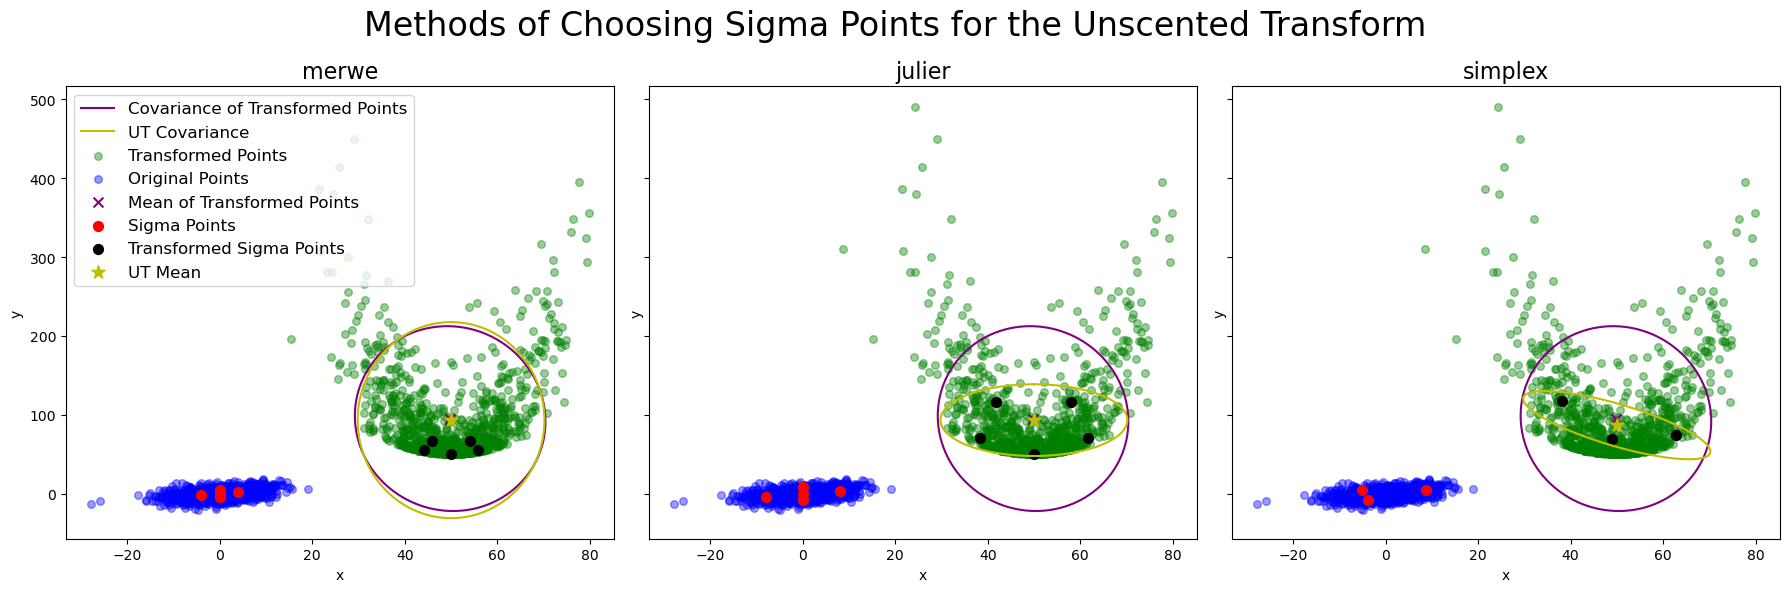

In [5]:
illustrate_unscented_transform(ut_dict, xs, ys, xs_nl, ys_nl, title='Methods of Choosing Sigma Points for the Unscented Transform')

In [5]:
def illustrate_ut(f, mean, p):

    # generate random points
    np.random.seed(100)
    xs, ys = multivariate_normal(mean=mean, cov=p, size=3000).T

    # pass through nonlinear function
    xs_nl, ys_nl = f(xs, ys)

    alpha = .5
    beta = 2
    kappa = 0

    mean_ut_merwe, cov_ut_merwe, sigmas_merwe, sigmas_f_merwe = unscented_transform(mean, p, f, method='merwe')
    mean_ut_julier, cov_ut_julier, sigmas_julier, sigmas_f_julier = unscented_transform(mean, p, f, method='julier')
    mean_ut_simplex, cov_ut_simplex, sigmas_simplex, sigmas_f_simplex = unscented_transform(mean, p, f, method='simplex')

    # collect in dictionary
    ut_dict = { 'merwe': {'mean': mean_ut_merwe, 'cov': cov_ut_merwe, 'sigmas': sigmas_merwe, 'sigmas_f': sigmas_f_merwe},
                'julier': {'mean': mean_ut_julier, 'cov': cov_ut_julier, 'sigmas': sigmas_julier, 'sigmas_f': sigmas_f_julier},
                'simplex': {'mean': mean_ut_simplex, 'cov': cov_ut_simplex, 'sigmas': sigmas_simplex, 'sigmas_f': sigmas_f_simplex}}


    illustrate_unscented_transform(ut_dict, xs, ys, xs_nl, ys_nl, title=f'Unscented Transform')

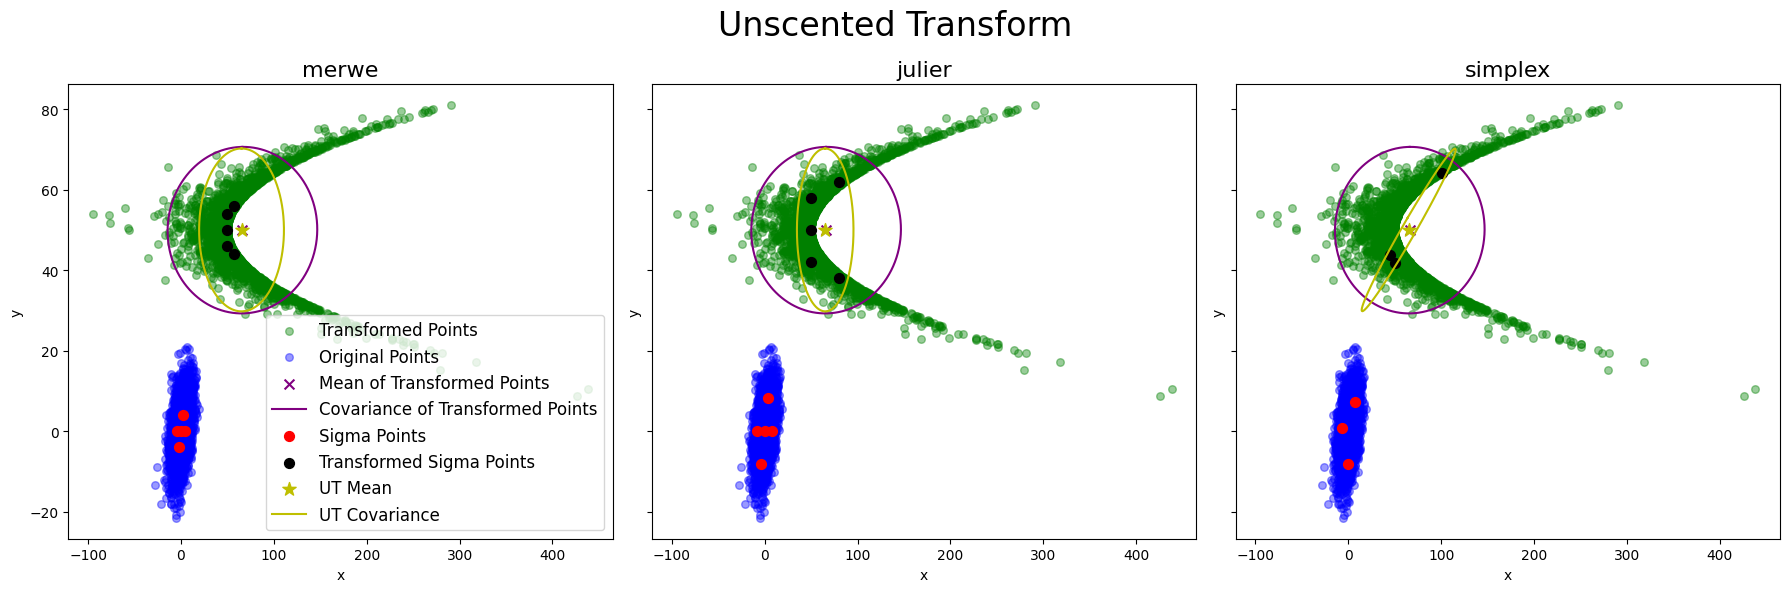

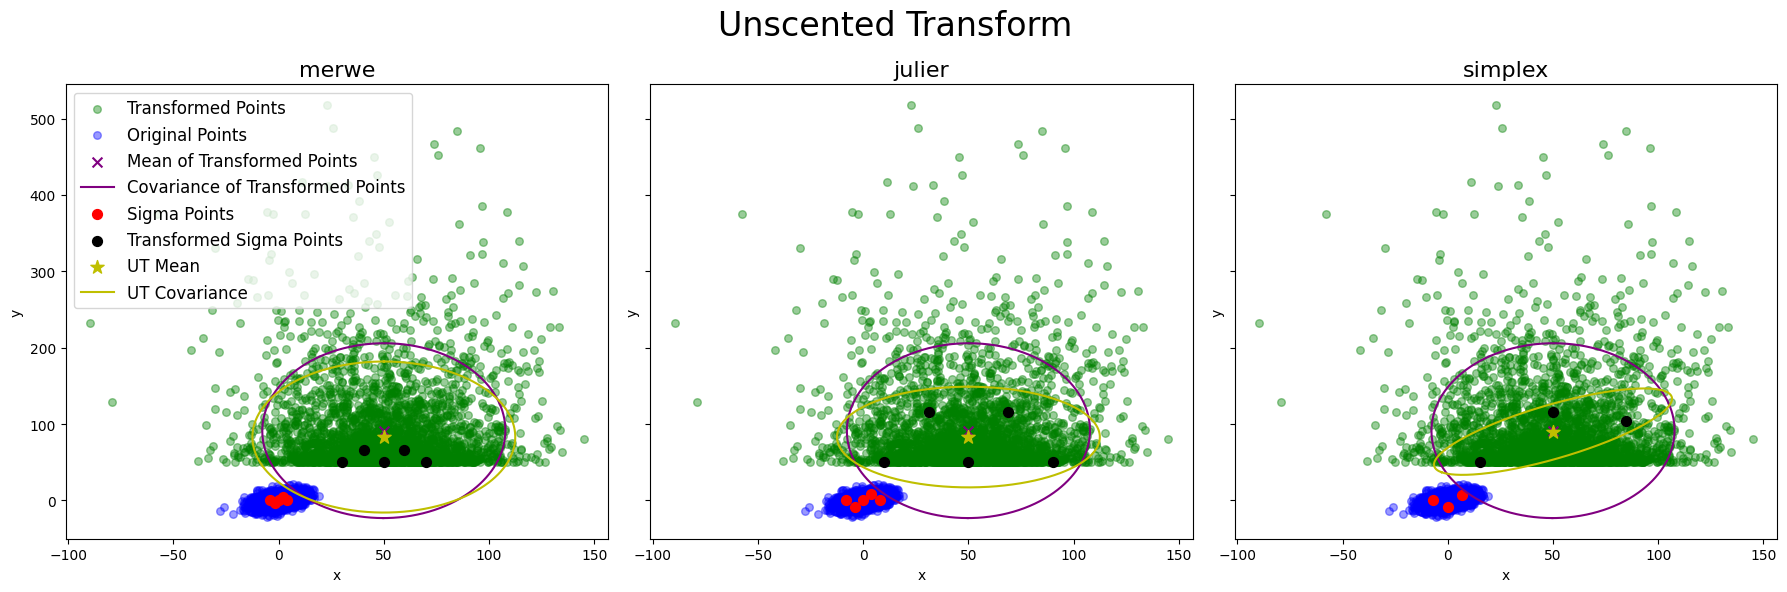

In [6]:
mean = (0., 0.)
p = np.array([[32, 15], [15, 40.]])

f1 = lambda x, y: np.array([x*y+50, x+y+50])
illustrate_ut(f1, mean, p)

f2 = lambda x, y: np.array([x*5+50, y**2+50])
illustrate_ut(f2, mean, p)